In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

###  Load national park data from ArcGIS

In [2]:
national_parks_shp = gpd.read_file('../input_data/NPS/NPS_-_Land_Resources_Division_Boundary_and_Tract_Data_Service.shp')

In [4]:
national_parks_filt = national_parks_shp.drop(['DATE_EDIT', 'CREATED_BY', 'CreationDa', 'Creator', 'EditDate', 'Editor', 'GIS_Notes'], axis=1)
national_parks_filt.head()

,OBJECTID,UNIT_CODE,UNIT_NAME,STATE,REGION,GNIS_ID,UNIT_TYPE,METADATA,PARKNAME,Shape__Are,Shape__Len,GlobalID,geometry
0,1,AMME,American Memorial Park,MP,PW,1879026,Park,Preliminary data. Contact the Land Resources P...,American Memorial Park,6.113585e+05,7740.973865,79037b52-9d9c-4f8c-b65b-70b810814fb0,"POLYGON ((16221864.905 1714852.206, 16221867.9..."
1,2,CEBE,Cedar Creek and Belle Grove National Historica...,VA,NE,1985663,National Historical Park,https://irma.nps.gov/DataStore/Reference/Profi...,Cedar Creek & Belle Grove,2.328283e+07,53250.857647,dfdc7906-209d-42e5-95e8-5a0377ca9b06,"MULTIPOLYGON (((-8715759.414 4724026.776, -871..."
2,3,LIBI,Little Bighorn Battlefield National Monument,MT,IM,806297,National Monument,https://irma.nps.gov/DataStore/Reference/Profi...,Little Bighorn Battlefield,6.437513e+06,19524.580108,a3affc26-f98a-417d-aa5b-41cfb4988cc8,"MULTIPOLYGON (((-11953415.314 5703937.476, -11..."
3,4,CAVO,Capulin Volcano National Monument,NM,IM,936867,National Monument,https://irma.nps.gov/DataStore/Reference/Profi...,Capulin Volcano,4.997144e+06,10529.570772,646548c2-c5b8-4298-a6b2-a82b5977581e,"POLYGON ((-11575101.835 4409222.280, -11574603..."
4,5,FOBO,Fort Bowie National Historic Site,AZ,IM,1888916,National Historic Site,https://irma.nps.gov/DataStore/Reference/Profi...,Fort Bowie,5.650399e+06,18638.556950,a19874b5-9d2e-409b-ba2a-8b52f4649602,"POLYGON ((-12187153.674 3783174.666, -12187626..."


In [6]:
national_parks_filt.to_pickle("../../21_6_1/notebooks/national_parks_filt.pkl")

###  Clean and explore national parks df

In [7]:
national_parks_filt['STATE'].unique() #56
# non continental states represented: MP, PR, DC, GU, AS

array(['MP', 'VA', 'MT', 'NM', 'AZ', 'FL', 'UT', 'DC', 'MS', 'CA', 'SC',
       'NY', 'VI', 'MD', 'MA', 'KS', 'TN', 'WY', 'KY', 'GA', 'NJ', 'TX',
       'HI', 'MO', 'AL', 'PA', 'LA', 'NV', 'MI', 'NC', 'SD', 'OH', 'MN',
       'AR', 'ID', 'WA', 'NH', 'IN', 'CO', 'ND', 'NE', 'IL', 'VT', 'RI',
       'GU', 'OR', 'DE', 'CT', 'ME', 'WI', 'AS', 'OK', 'AK', 'IA', 'PR',
       'WV'], dtype=object)

In [8]:
state_count_df = (national_parks_filt['STATE'].value_counts().reset_index()
                                              .rename(columns={"index": "state", "STATE": "count"}))

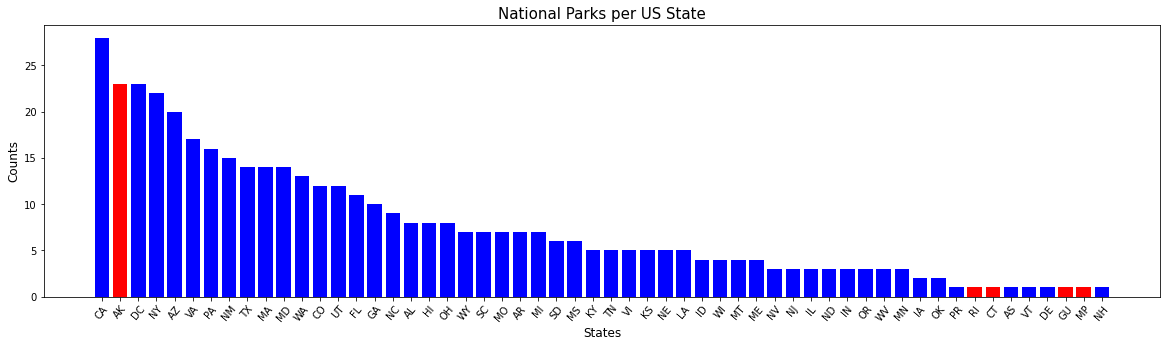

In [9]:
fig = plt.figure(figsize = (20, 5))
 
plt.xlabel("States", size=12)
plt.ylabel("Counts", size =12)
plt.title("National Parks per US State", size=15)
plt.xticks(rotation=50)

count = list(state_count_df['count'])
states = list(state_count_df['state'])

# Create bars with different colors
    
plt.bar(states, count, color=['blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
                             'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
                             'blue', 'blue','blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
                             'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
                             'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue'])
plt.show()

###  Examine one park to confirm accuracy - Yellowstone

In [10]:
yellowstone_shp = gpd.read_file('../input_data/YELL_tracts/YELL_boundary.shp')

In [13]:
yellowstone_shp

,UNIT_TYPE,STATE,REGION,UNIT_CODE,UNIT_NAME,DATE_EDIT,GIS_NOTES,CREATED_BY,METADATA,PARKNAME,geometry
0,National Park,WY,IM,YELL,Yellowstone National Park,2008-04-23,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lands,http://nrdata.nps.gov/programs/Lands/YELL_meta...,Yellowstone,"POLYGON ((-111.09707 44.48732, -111.09707 44.4..."


###  Plot Yellowstone

Text(0.5, 1.0, 'Yellowstone National Park')

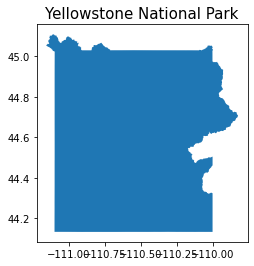

In [14]:
%matplotlib inline
yel_bound = yellowstone_shp.plot()
yel_bound.set_title('Yellowstone National Park', fontsize=15)

### Given a lat/long coord, we want to be able identify if it falls within the bounds of a park

In [15]:
from shapely.geometry import Point

p1 = Point(-110.75, 44.4) # this point should be within yellowstone
p2 = Point(-100.03, 44.4) # this point should not be within yellowstone

print(yellowstone_shp.geometry.contains(p1))
print(yellowstone_shp.geometry.contains(p2))


0    True
dtype: bool
0    False
dtype: bool


### Load state park data from ArcGIS and isolate state parks from other parks and forests

In [16]:
all_parks = gpd.read_file('../input_data/park_geodata/park_dtl.gdb-polygon.shp')

In [17]:
all_parks

,NAME,FEATTYPE,MNFC,SQMI,Shape_Leng,Shape_Area,geometry
0,Pago Pago Park,Local park,7170,0.02,0.010034,0.000005,"POLYGON ((-170.70291 -14.27240, -170.70316 -14..."
1,National Park of American Samoa,National park or forest,7170,4.06,0.326497,0.000881,"MULTIPOLYGON (((-170.71479 -14.28528, -170.714..."
2,National Park of American Samoa,National park or forest,7170,8.36,0.313004,0.001814,"MULTIPOLYGON (((-169.48774 -14.27263, -169.487..."
3,Hawaiian Islands National Wildlife Refuge,Regional park,7170,2.67,0.327720,0.000620,"MULTIPOLYGON (((-161.92806 23.05707, -161.9281..."
4,Russian Fort Elizabeth State Historical Park,State park or forest,7170,0.03,0.010972,0.000006,"POLYGON ((-159.66526 21.94916, -159.66526 21.9..."
...,...,...,...,...,...,...,...
58023,Wettengel Park,Local park,7170,0.02,0.009093,0.000004,"POLYGON ((144.83280 13.52291, 144.83261 13.522..."
58024,Admiral William E Leahy Sports Complex,Local park,7170,0.01,0.006959,0.000003,"POLYGON ((144.80576 13.47273, 144.80573 13.472..."
58025,Two Lovers Point Park,Local park,7170,0.05,0.013617,0.000010,"POLYGON ((144.80559 13.53381, 144.80564 13.533..."
58026,Anao Conservation Area,Regional park,7170,1.21,0.100135,0.000261,"POLYGON ((144.92475 13.52035, 144.92467 13.520..."


In [18]:
state_parks = all_parks[all_parks['FEATTYPE'].str.contains("State park")]

In [19]:
state_parks = state_parks.reset_index(drop=True)

In [20]:
## note: not only continental US

In [21]:
state_parks

,NAME,FEATTYPE,MNFC,SQMI,Shape_Leng,Shape_Area,geometry
0,Russian Fort Elizabeth State Historical Park,State park or forest,7170,0.03,0.010972,6.374467e-06,"POLYGON ((-159.66526 21.94916, -159.66526 21.9..."
1,Polihale State Park,State park or forest,7170,0.32,0.065322,7.342406e-05,"POLYGON ((-159.76908 22.07109, -159.77143 22.0..."
2,Nualolo Kai State Park,State park or forest,7170,0.03,0.017996,7.051423e-06,"POLYGON ((-159.69699 22.16104, -159.69702 22.1..."
3,Milolii State Park,State park or forest,7170,0.06,0.038908,1.363739e-05,"POLYGON ((-159.72213 22.14910, -159.72266 22.1..."
4,Na Pali Coast State Wilderness Park,State park or forest,7170,22.61,0.409562,5.127758e-03,"POLYGON ((-159.64400 22.14039, -159.64429 22.1..."
...,...,...,...,...,...,...,...
4649,Tagachang Beach Park,State park or forest,7170,0.21,0.042131,4.637364e-05,"POLYGON ((144.78196 13.40248, 144.78197 13.402..."
4650,Man Apu Park,State park or forest,7170,0.00,0.002017,2.859566e-07,"POLYGON ((144.77643 13.41252, 144.77626 13.412..."
4651,Matapang Beach Park,State park or forest,7170,0.00,0.003737,7.225203e-07,"POLYGON ((144.80017 13.50677, 144.80011 13.506..."
4652,South Pacific Memorial Park,State park or forest,7170,0.01,0.008660,3.027913e-06,"POLYGON ((144.88593 13.54284, 144.88585 13.542..."


### Remove forests

In [22]:
state_parks_filt = state_parks[~state_parks["NAME"].str.contains("Forest")]
state_parks_filt

,NAME,FEATTYPE,MNFC,SQMI,Shape_Leng,Shape_Area,geometry
0,Russian Fort Elizabeth State Historical Park,State park or forest,7170,0.03,0.010972,6.374467e-06,"POLYGON ((-159.66526 21.94916, -159.66526 21.9..."
1,Polihale State Park,State park or forest,7170,0.32,0.065322,7.342406e-05,"POLYGON ((-159.76908 22.07109, -159.77143 22.0..."
2,Nualolo Kai State Park,State park or forest,7170,0.03,0.017996,7.051423e-06,"POLYGON ((-159.69699 22.16104, -159.69702 22.1..."
3,Milolii State Park,State park or forest,7170,0.06,0.038908,1.363739e-05,"POLYGON ((-159.72213 22.14910, -159.72266 22.1..."
4,Na Pali Coast State Wilderness Park,State park or forest,7170,22.61,0.409562,5.127758e-03,"POLYGON ((-159.64400 22.14039, -159.64429 22.1..."
...,...,...,...,...,...,...,...
4649,Tagachang Beach Park,State park or forest,7170,0.21,0.042131,4.637364e-05,"POLYGON ((144.78196 13.40248, 144.78197 13.402..."
4650,Man Apu Park,State park or forest,7170,0.00,0.002017,2.859566e-07,"POLYGON ((144.77643 13.41252, 144.77626 13.412..."
4651,Matapang Beach Park,State park or forest,7170,0.00,0.003737,7.225203e-07,"POLYGON ((144.80017 13.50677, 144.80011 13.506..."
4652,South Pacific Memorial Park,State park or forest,7170,0.01,0.008660,3.027913e-06,"POLYGON ((144.88593 13.54284, 144.88585 13.542..."


### Isolate national parks from all_parks to confrim if equal to the only national park df from ArcGIS

In [23]:
nat_parks = all_parks[all_parks['FEATTYPE'].str.contains("National park")]

In [24]:
nat_parks = nat_parks.reset_index(drop=True)

In [25]:
len(nat_parks)

858

### Drop forests and duplicates from national parks dataframe

In [26]:
nat_parks_df = nat_parks[~nat_parks["NAME"].str.contains("Forest")]
nat_parks_df = nat_parks_df.reset_index(drop=True)
len(nat_parks_df)

621

In [27]:
nat_parks_filt_df = nat_parks_df.drop_duplicates(["NAME"]).copy()
len(nat_parks_filt_df)

556

In [28]:
nat_parks_filt_df

,NAME,FEATTYPE,MNFC,SQMI,Shape_Leng,Shape_Area,geometry
0,National Park of American Samoa,National park or forest,7170,4.06,0.326497,0.000881,"MULTIPOLYGON (((-170.71479 -14.28528, -170.714..."
2,U S S Arizona Memorial,National park or forest,7170,0.01,0.005446,0.000002,"POLYGON ((-157.94988 21.36449, -157.95000 21.3..."
3,Kalaupapa National Historical Park,National park or forest,7170,12.76,0.510988,0.002874,"MULTIPOLYGON (((-156.90779 21.12689, -156.9122..."
4,Kaloko Honokohau National Historical Park,National park or forest,7170,1.86,0.120178,0.000415,"POLYGON ((-156.02397 19.66370, -156.02463 19.6..."
5,Puuhonua O Honaunau National Historical Park,National park or forest,7170,0.33,0.050701,0.000074,"POLYGON ((-155.90458 19.40954, -155.90515 19.4..."
...,...,...,...,...,...,...,...
616,Asan Beach,National park or forest,7170,0.90,0.066921,0.000194,"MULTIPOLYGON (((144.66395 13.39024, 144.66392 ..."
617,Piti Guns,National park or forest,7170,0.04,0.013232,0.000008,"POLYGON ((144.69775 13.45829, 144.69745 13.458..."
618,Fonte Plateau,National park or forest,7170,0.05,0.013677,0.000010,"POLYGON ((144.73092 13.46071, 144.73066 13.460..."
619,Asan Overlook,National park or forest,7170,0.73,0.073907,0.000158,"POLYGON ((144.71593 13.45954, 144.71419 13.459..."


### Examine one state park to confirm accuracy - Chatfield State Park

In [30]:
state_parks.loc[1067]

NAME                                       Chatfield State Park
FEATTYPE                                   State park or forest
MNFC                                                       7170
SQMI                                                       9.49
Shape_Leng                                             0.405976
Shape_Area                                           0.00257492
geometry      (POLYGON ((-105.0957129 39.49084699999997, -10...
Name: 1067, dtype: object

Text(0.5, 1.0, 'Chatfield State Park')

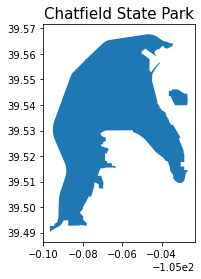

In [31]:
%matplotlib inline
park = state_parks.loc[[1067],'geometry'].plot()
park.set_title("Chatfield State Park", fontsize=15)

### Map of chatfield from google to compare shape

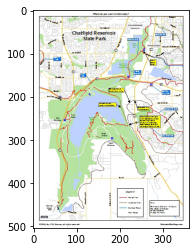

In [4]:
image = plt.imread('../input_data/chatfield_state_park.jpeg')
plt.imshow(image)
plt.show()

### Dataframe for national, sate, local, regional, and county parks from ArcGIS -- (decided to use all parks and not just national and state parks)

In [33]:
all_parks_f = all_parks[all_parks.NAME.notnull()]

In [34]:
all_parks_filt = all_parks_f[~all_parks_f["NAME"].str.contains("Forest")]

In [35]:
all_parks_df = all_parks_filt.drop_duplicates(["NAME"]).copy()

In [39]:
all_parks_df.loc[(all_parks.FEATTYPE == 'National park or forest'),'FEATTYPE']='National park'
all_parks_df.loc[(all_parks.FEATTYPE == 'State park or forest'),'FEATTYPE']='State park'

In [40]:
all_parks_df.head()

,NAME,FEATTYPE,MNFC,SQMI,Shape_Leng,Shape_Area,geometry
0,Pago Pago Park,Local park,7170,0.02,0.010034,0.000005,"POLYGON ((-170.70291 -14.27240, -170.70316 -14..."
1,National Park of American Samoa,National park,7170,4.06,0.326497,0.000881,"MULTIPOLYGON (((-170.71479 -14.28528, -170.714..."
3,Hawaiian Islands National Wildlife Refuge,Regional park,7170,2.67,0.327720,0.000620,"MULTIPOLYGON (((-161.92806 23.05707, -161.9281..."
4,Russian Fort Elizabeth State Historical Park,State park,7170,0.03,0.010972,0.000006,"POLYGON ((-159.66526 21.94916, -159.66526 21.9..."
5,Waimea Recreation Pier Park,Local park,7170,0.01,0.004661,0.000001,"POLYGON ((-159.66955 21.95445, -159.66961 21.9..."


In [ ]:
all_parks_df.to_pickle("../../21_6_1/notebooks/all_parks_df.pkl")

In [90]:
all_parks['FEATTYPE'].unique()

array(['Local park', 'National park or forest', 'Regional park',
       'State park or forest', 'County park'], dtype=object)